### **Student Credentials**

* **Name:**  Arav Jain
* **Enrollment Number:**  240394
* **Section:**  CSE-1
* **Course:** Data Analytics Using Python
* **Batch:**  2024-2028

### **Project Description:**

This project focuses on analyzing and modeling **Café Sales data** using a real-world dataset from Kaggle. The goal is to understand the factors that influence sales and build a predictive model capable of estimating the **total bill amount** for café orders.

The workflow begins with **data cleaning**, where missing values, duplicate entries, inconsistent product names, incorrect prices, and formatting issues are identified and fixed. Since the dataset includes both **categorical** (item, category, payment method) and **numerical** features (price, quantity, total), appropriate preprocessing techniques such as **handling outliers**, **standardizing formats**, and **encoding categorical variables** are applied.

After preparing the dataset, **Exploratory Data Analysis (EDA)** is performed to uncover meaningful patterns in customer purchases. Visualizations like bar charts, boxplots, and time-based sales graphs help reveal the **most popular items, high-revenue categories, common purchase times,** and relationships between item price, quantity, and total bill. These insights are complemented by **statistical tests** to determine whether factors such as **item category** significantly influence sales behavior or transaction amounts.

Finally, a **Regression model** is developed to predict the **total bill amount** based on item characteristics and purchase details. Model performance is evaluated using standard **regression metrics**, allowing us to assess how well the model captures sales patterns and how it could support café operations in **forecasting revenue** or **optimizing product offerings**.

## ***Step 1: Problem Definition & Dataset Selection***

### **1. Objective**
The objective of this project is to analyze café sales data to identify purchasing patterns and to build a predictive model that estimates the Total Spent Amount by customers based on product and transaction features.

### **2. Dataset Source**
* **Source**:Kaggle
* **Link**: [https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data)
* **Description**: This dataset contains 10,000 café transaction records with detailed information about customer purchases. It includes item-related attributes (item, price_per_unit, quantity), financial information (total_spent), transactional details (transaction_id, payment_method, location), and a time component (date), providing a comprehensive view of café sales activity.

### **3. Setup Import Libraries**

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
import scipy.stats as stats

# For machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# For modeling
from sklearn.linear_model import LinearRegression

# For evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("All libraries imported successfully!")

All libraries imported successfully!


### **4. Loading and Describing Dataset:**

In [2]:
df = pd.read_csv("cafe_sales.csv")

print("--- First 5 Rows ---")
print("\n")
display(df.head())  
print("\n")

print("--- Numerical Summary ---")
print("\n")
print(df.describe())

--- First 5 Rows ---




,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11




--- Numerical Summary ---


       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


### **5. Column Description**
| Column Name        | Data Type       | Level of Measurement | Explanation                                                                                              |
| ------------------ | --------------- | -------------------- | -------------------------------------------------------------------------------------------------------- |
| **transaction_id** | Integer         | Nominal              | Acts as an identifier only.                             |
| **item**           | Object (string) | Nominal              | Represents product names; categorical labels with no order.|
| **quantity**       | Integer         | Ratio                | A numeric count with a meaningful zero (0 items = none).|
| **price_per_unit** | Float           | Ratio                | Monetary value with a true zero; ratios are meaningful. |
| **total_spent**    | Float           | Ratio                | Total monetary amount; has a true zero and supports meaningful ratio comparisons.                        |
| **payment_method** | Object (string) | Nominal              | Categorical method of payment (cash, card).                                                 |
| **location**       | Object (string) | Nominal              | Represents store or branch (labels).                                            |
| **date**           | DateTime        | Interval             | Dates have meaningful differences (time intervals), but no true zero point or meaningful ratios.         |


## ***Step 2: Data Cleaning & Preparation***
In this step, we will transform our raw café sales dataset into a clean, consistent, and well-structured format suitable for analysis and machine learning. This preprocessing stage is essential because the dataset contains variations in formatting, missing values, inconsistent entries, and non-numeric columns that need proper handling. By improving data quality and converting all features into usable formats, we ensure that our analysis becomes more reliable and that our predictive model performs accurately and meaningfully.

### **1. Handle Missing Values**

Some missing or invalid entries in the dataset are not real NaN values but appear as strings like “error” or “unknown.” To handle them properly, we first inspect each column’s unique values and replace these incorrect entries with actual NaN.

In [3]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:30])   # show unique values


Column: Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' 'TXN_7034554' 'TXN_3160411'
 'TXN_2602893' 'TXN_4433211' 'TXN_6699534' 'TXN_4717867' 'TXN_2064365'
 'TXN_2548360' 'TXN_3051279' 'TXN_7619095' 'TXN_9437049' 'TXN_8915701'
 'TXN_2847255' 'TXN_3765707' 'TXN_6769710' 'TXN_8876618' 'TXN_3709394'
 'TXN_3522028' 'TXN_3567645' 'TXN_5132361' 'TXN_2616390' 'TXN_9400181'
 'TXN_7958992' 'TXN_5183041' 'TXN_5695074' 'TXN_8467949' 'TXN_7640952']

Column: Item
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Column: Quantity
['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

Column: Price Per Unit
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

Column: Total Spent
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

Column: Payment Method
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Column: Location
['Takeaway' 'In-store' 'UNKNOWN' nan 

In [4]:
invalid_values = ["ERROR", "UNKNOWN"]
df.replace(invalid_values, np.nan, inplace=True)

# Check if invalid values have been replaced:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:30])   # show unique values


Column: Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' 'TXN_7034554' 'TXN_3160411'
 'TXN_2602893' 'TXN_4433211' 'TXN_6699534' 'TXN_4717867' 'TXN_2064365'
 'TXN_2548360' 'TXN_3051279' 'TXN_7619095' 'TXN_9437049' 'TXN_8915701'
 'TXN_2847255' 'TXN_3765707' 'TXN_6769710' 'TXN_8876618' 'TXN_3709394'
 'TXN_3522028' 'TXN_3567645' 'TXN_5132361' 'TXN_2616390' 'TXN_9400181'
 'TXN_7958992' 'TXN_5183041' 'TXN_5695074' 'TXN_8467949' 'TXN_7640952']

Column: Item
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']

Column: Quantity
['2' '4' '5' '3' '1' nan]

Column: Price Per Unit
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan]

Column: Total Spent
['4.0' '12.0' nan '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' '2.0' '1.0' '7.5' '4.5' '1.5']

Column: Payment Method
['Credit Card' 'Cash' nan 'Digital Wallet']

Column: Location
['Takeaway' 'In-store' nan]

Column: Transaction Date
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-0

## Check every column for empty or NaN values

In [5]:
print("Check Missing Values:")
print(df.isnull().sum())
print("\n")

Check Missing Values:
Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64




## Imputing NaN Values

The median is used for numerical columns because it is robust to outliers and provides a more reliable central value than the mean when the data is skewed.

In [6]:
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]

# If numeric columns contain strings, convert them
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Use median imputation for numerical columns (robust against outliers):
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

The mode is used for categorical columns because it preserves the most common category, ensuring that the filled values remain valid and meaningful within the dataset.

In [7]:
cat_cols = ["Item", "Payment Method", "Location"]

# Use mode for categorical columns (most frequent category)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Because café transactions occur sequentially over time, missing dates can be safely inferred from neighboring records. Forward-fill copies the most recent valid date, and backward-fill fills any remaining gaps using the next available date.

In [8]:
# Convert tramsaction date to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Fill missing dates using forward-fill + backward-fill
df["Transaction Date"] = df["Transaction Date"].ffill().bfill()

## Verify every column has no NaN values

In [9]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

### **2. Remove Duplicates and Irrelevant Columns**

In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


No duplicate rows found in the dataset. After checking using df.duplicated().sum(), the result returned zero duplicates, meaning every transaction entry is unique. Therefore, no removal of duplicate records is necessary at this stage.

In [11]:
df.drop('Transaction ID', axis=1, inplace=True)

The 'Transaction ID' column was removed because it is simply a unique identifier and does not contain any meaningful information for analysis or modeling.

### **3. Handle Outliers**
Outliers can distort averages, influence model training, and affect overall data patterns. Since our café dataset contains numerical columns like Quantity, Price Per Unit, and Total Spent, we detect and treat outliers using the IQR (Interquartile Range) method.

Outliers are identified using the IQR method because it is robust and does not assume normal distribution. Extreme values are capped (winsorized) within acceptable bounds to prevent them from skewing analysis and model performance.

In [12]:
# List of numerical columns to check for outliers
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers (winsorization)
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
    
    print(f"Outliers handled for: {col}")

Outliers handled for: Quantity
Outliers handled for: Price Per Unit
Outliers handled for: Total Spent


### **4. Encode Categorical Data**
Since the categorical variables (Item, Payment Method, Location) have no inherent order, One-Hot Encoding is the most appropriate choice.

In [13]:
df = df.copy(deep=True)

# Categorical columns to encode
cat_cols = ["Item", "Payment Method", "Location"]

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()

,Quantity,Price Per Unit,Total Spent,Transaction Date,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway
0,2.0,2.0,4.0,2023-09-08,True,False,False,False,False,False,False,True,False,True
1,4.0,3.0,12.0,2023-05-16,False,False,False,False,False,False,False,False,False,False
2,4.0,1.0,8.0,2023-07-19,False,True,False,False,False,False,False,True,False,False
3,2.0,5.0,10.0,2023-04-27,False,False,False,True,False,False,False,False,True,True
4,2.0,2.0,4.0,2023-06-11,True,False,False,False,False,False,False,False,True,False


## ***Step 3: Exploratory Data Analysis (EDA)***

### **1. Univariate Analysis**


## Distribution of Numerical Columns

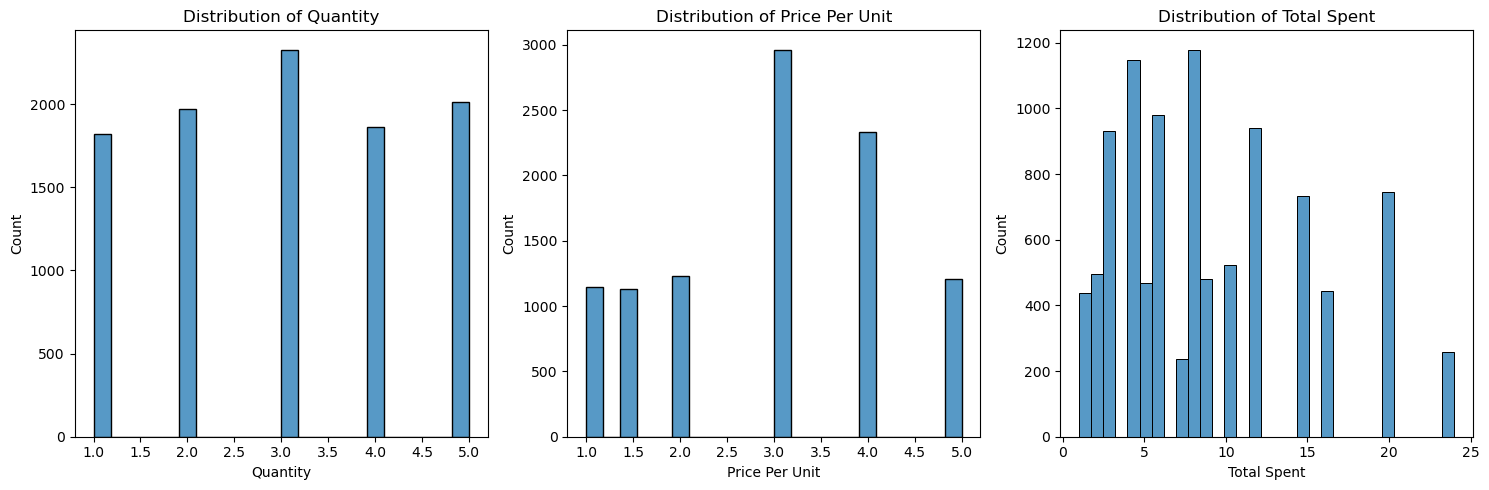

In [14]:
num_cols = ["Quantity", "Price Per Unit", "Total Spent"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

The histograms reveal the following insights:

1) **Quantity:** The most commonly purchased quantity is 3 (over 2,500 occurrences), although other quantities are also fairly frequent, ranging between 1,500 and 2,000.
2) **Price per Unit:** The most common price per unit is around 3, followed by 4. The lowest observed price is 1.5. The distribution is left-skewed, indicating that higher prices are more common, while lower prices occur less frequently.
3) **Total Spent:** The distribution of total spending is right-skewed, meaning most customers spend relatively small amounts (typically less than 15), with a few customers spending much more. This pattern aligns with typical cafe purchases.

### Boxplots for Outlier Visualization

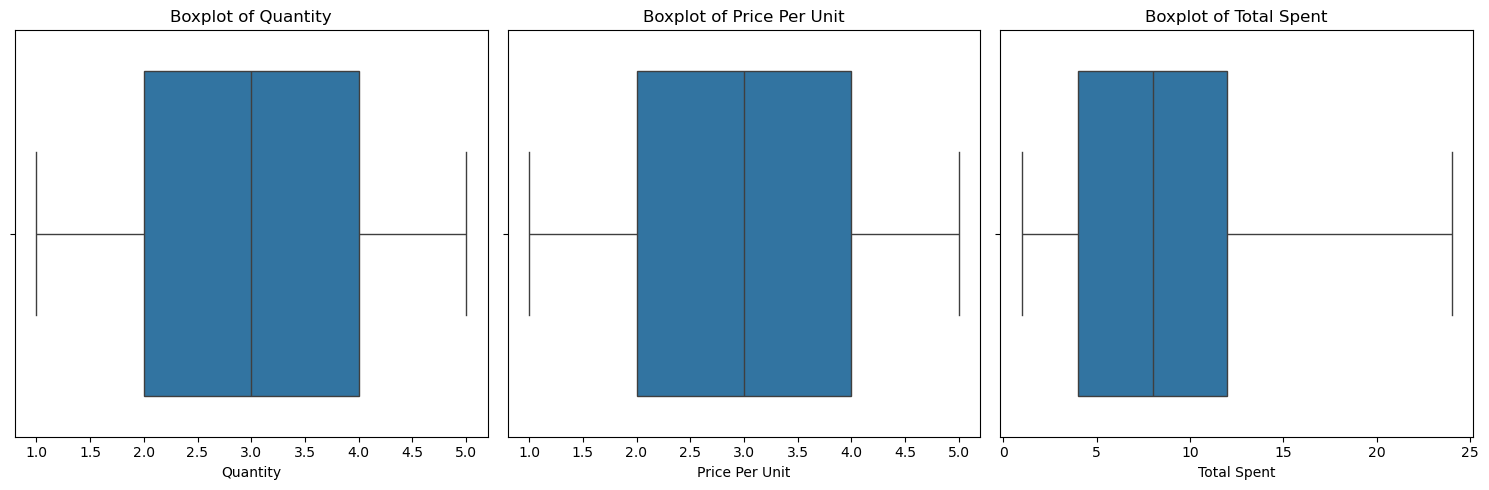

In [15]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

The boxplots reveal the following insights:

1) **Quantity:** The median quantity purchased is 3, with most purchases ranging between 2 and 4. The distribution is fairly symmetrical, and there appear to be no significant outliers.
2) **Price per Unit:** The median price per unit is around 3, with the interquartile range between 2 and 4. The distribution is also roughly symmetrical, with no extreme values standing out as outliers.
3) **Total Spent:** The median total spent is approximately 8, with most values between 4 and 12. The distribution shows a wider spread, indicating some higher total purchases, but no extreme outliers are visible.

## Distribution of Categorical Columns

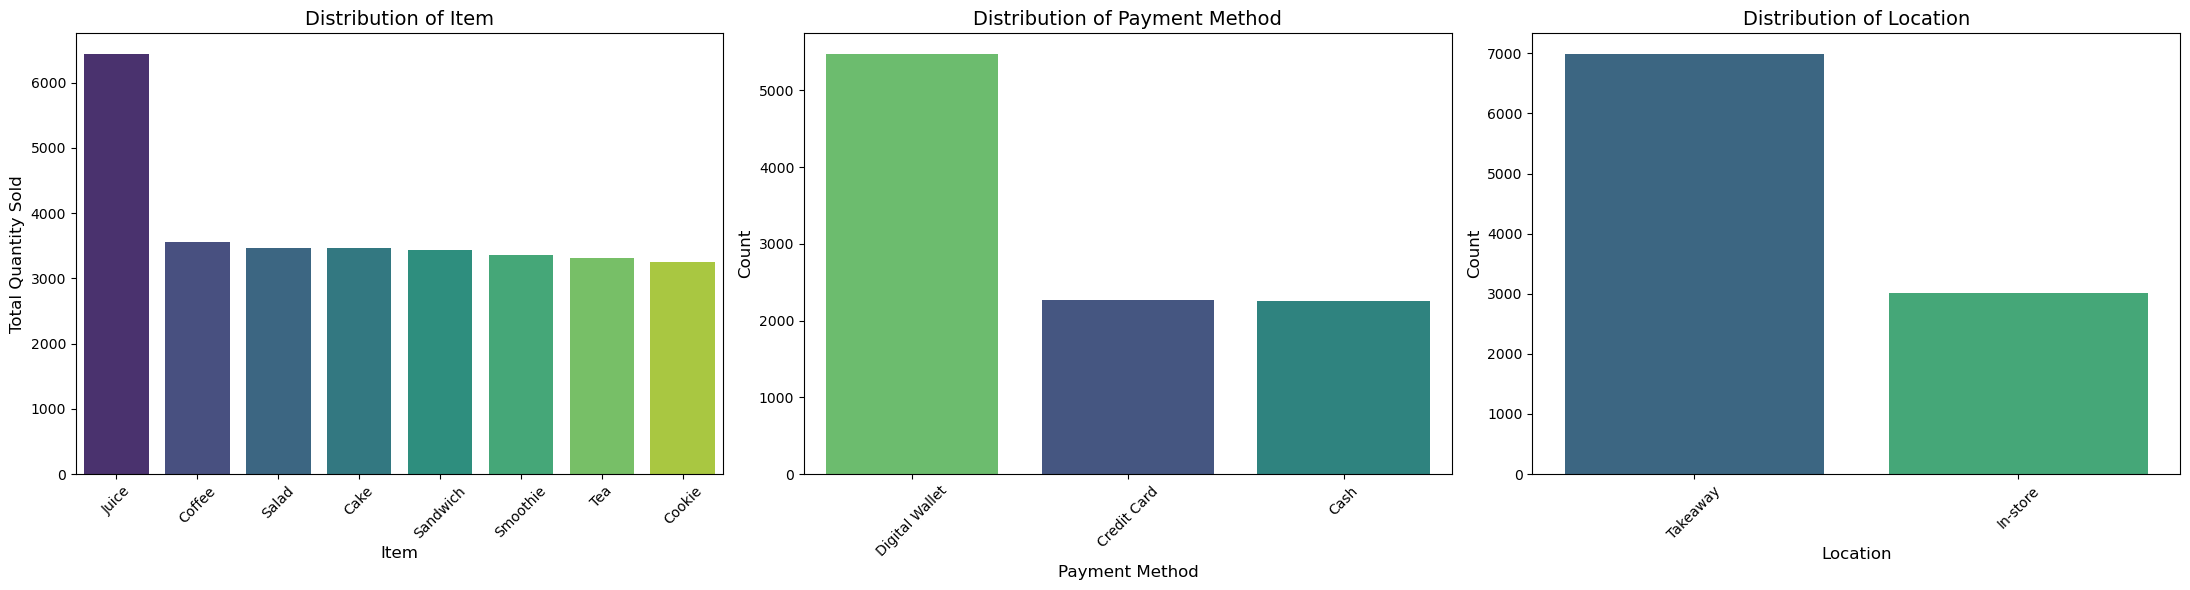

--- Total Quantity Sold per Item ---
Item
Juice       6435.0
Coffee      3551.0
Salad       3469.0
Cake        3467.0
Sandwich    3428.0
Smoothie    3353.0
Tea         3319.0
Cookie      3249.0
Name: Quantity, dtype: float64


In [16]:
cat_cols = ['Item', 'Payment Method', 'Location']

fig, axes = plt.subplots(1, 3, figsize=(22,6))

for ax, col in zip(axes, cat_cols):
    if col == 'Item':
        # Quantity-weighted bar chart
        qty_data = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
        sns.barplot(x=qty_data.index, y=qty_data.values, palette='viridis', ax=ax, hue=qty_data.index)
        ax.set_ylabel('Total Quantity Sold', fontsize=12)
    else:
        # Normal countplot
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', ax=ax, hue=col)
        ax.set_ylabel('Count', fontsize=12)
    
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

item_qty_summary = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
print("--- Total Quantity Sold per Item ---")
print(item_qty_summary)


1) **Distribution of Item:** Juice is the most popular item by a significant margin, with over 6,000 sales. All other items (like Coffee, Salad, Cake, and Sandwich) have much lower and relatively uniform sales counts, each clustered around 3,400.

2) **Distribution of Payment Method:** Digital Wallet is the most dominant payment method, used in over 5,000 transactions. This is more than double the usage of Credit Card and Cash, which are both used far less frequently and in almost equal amounts (around 2,250 each).

3) **Distribution of Location:** Takeaway orders are much more common than in-person purchases. Takeaway accounts for 7,000 transactions, which is more than double the 3,000 transactions that occur In-store.

### Categorizing Items

In [17]:
# Define the category mapping for specific itms
item_categories = {
    'Coffee': ['Coffee'],
    'Tea': ['Tea'],
    'Cold Drinks': ['Smoothie', 'Juice'],
    'Food': ['Cake', 'Cookie', 'Salad', 'Sandwich']
}

# Create a reverse mapping for categorization
category_mapping = {}
for category, items in item_categories.items():
    for item in items:
        category_mapping[item] = category

# Function to categorize items 
def categorize_item(item):
    for key in category_mapping:
        if key in item:
            return category_mapping[key]
    return 'Other'
    
df['Item_Category'] = df['Item'].apply(categorize_item) 

df.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_Category
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Coffee
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Food
2,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,Food
3,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,Food
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Coffee


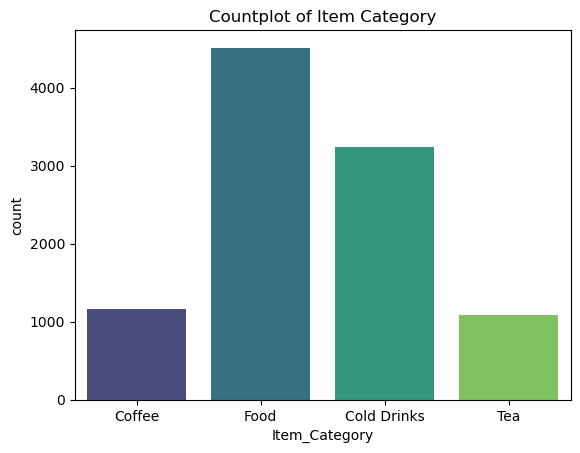

In [18]:
sns.countplot(data=df, x='Item_Category', palette='viridis', hue='Item_Category')
plt.title("Countplot of Item Category")
plt.show()

This countplot shows that food is the most frequently purchased item. Cold drinks are in second place, indicating that they are the most preferred beverage compared to tea and coffee. The total number of beverage purchases exceeds that of food, which suggests that people often buy beverages on their own as well.

### **2. Bivariate Analysis**

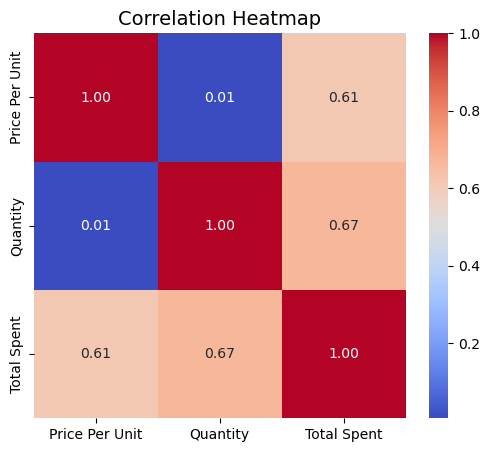

In [19]:
# -----------------------------
# 1. Correlation Heatmap
# -----------------------------
numerical_cols = ['Price Per Unit', 'Quantity', 'Total Spent']
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

1) **Total Spent vs. Other Factors:** "Total Spent" has a moderate positive correlation with both "Quantity" (0.67) and "Price Per Unit" (0.61). This logically shows that as either the number of items purchased or the price of those items increases, the total amount spent also tends to increase.

2) **Price vs. Quantity:** There is almost no correlation (0.01) between "Price Per Unit" and "Quantity." This indicates that the price of an item does not significantly influence the quantity of that item being purchased.

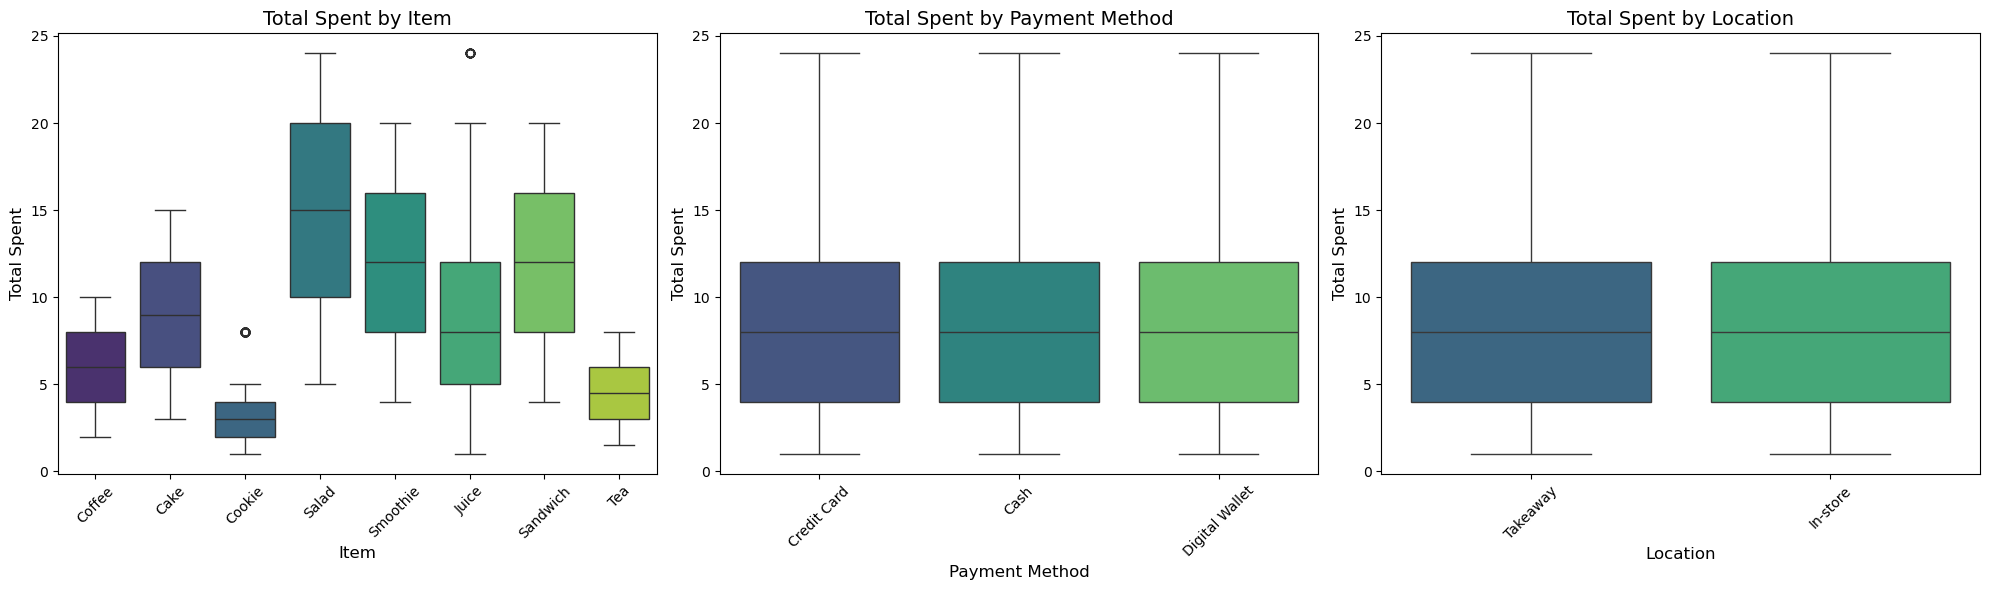

In [30]:
# -----------------------------
# 2. Boxplots (Numerical vs Categorical)
# -----------------------------
categorical_cols = ['Item', 'Payment Method', 'Location']
fig, axes = plt.subplots(1, 3, figsize=(20,6))

for ax, col in zip(axes, categorical_cols):
    sns.boxplot(data=df, x=col, y='Total Spent', palette='viridis', ax=ax, hue=col)
    ax.set_title(f'Total Spent by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Total Spent', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1) **Total Spent by Item:** The amount spent varies significantly by item. "Salad" has the highest median "Total Spent" (around 16) and one of the widest spending ranges. "Smoothie" and "Sandwich" also show high median spending. In contrast, items like "Coffee," "Cake," "Cookie," and "Tea" have much lower median spending (all under 10), suggesting they are typically smaller, lower-cost purchases.

2) **Total Spent by Payment Method:** The spending distribution is nearly identical across all three payment methods. "Credit Card," "Cash," and "Digital Wallet" all share the same median (around 8), the same interquartile range, and the same overall range. This indicates that a customer's choice of payment does not influence how much they spend.

4) **Total Spent by Location:** Similar to payment method, the "Total Spent" distribution is exactly the same for both "Takeaway" and "In-store" purchases. Both locations have the same median, range, and box size, suggesting there is no difference in spending habits whether the customer stays or leaves.

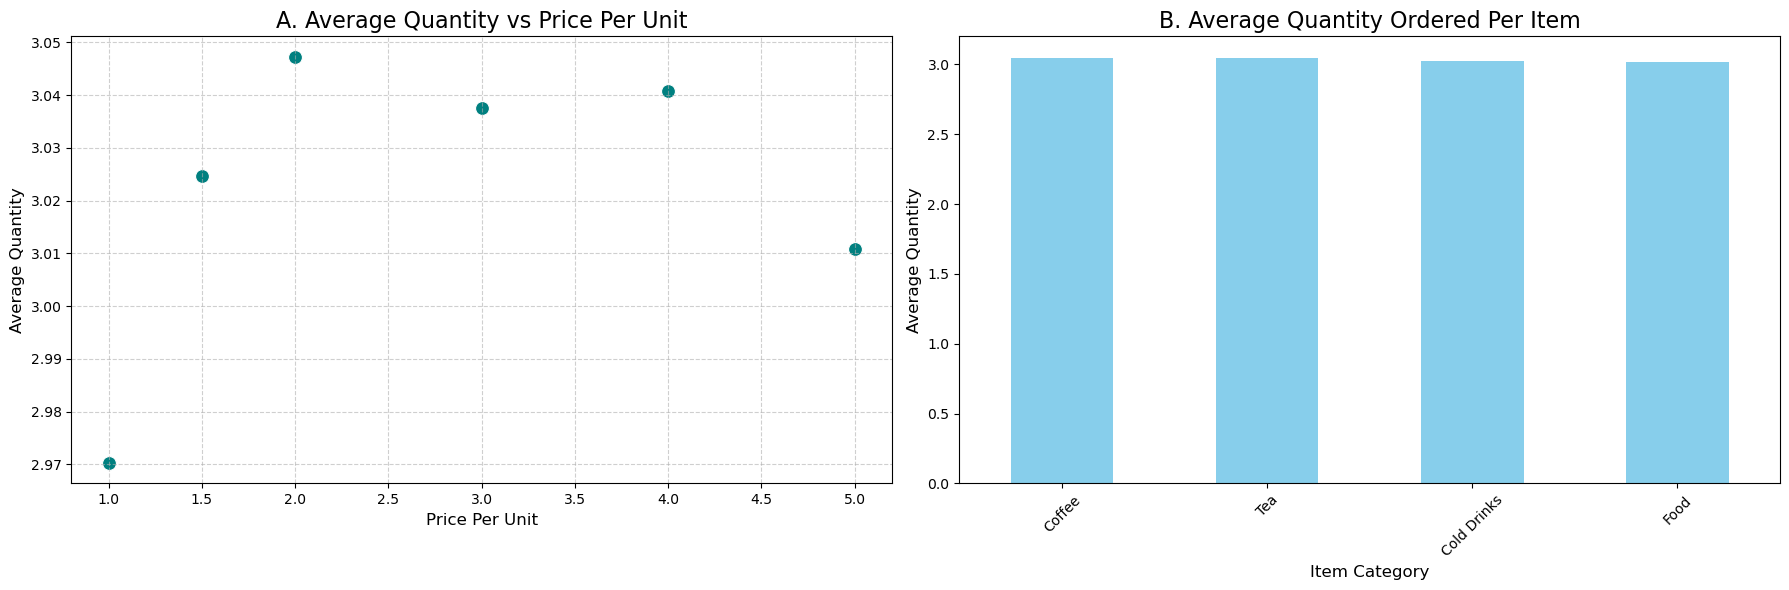

In [21]:
# 1. Average Quantity vs Price Per Unit (for Scatter Plot)
avg_quantity = df.groupby('Price Per Unit')['Quantity'].mean().reset_index()

# 2. Average Quantity Ordered Per Item  Category(for Bar Plot)
mean_quantity = df.groupby('Item_Category')['Quantity'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1: Scatter Plot (Average Quantity vs Price Per Unit) ---
ax1 = axes[0]
sns.scatterplot(data=avg_quantity, x='Price Per Unit', y='Quantity', s=100, color='teal', ax=ax1)
ax1.set_title('A. Average Quantity vs Price Per Unit', fontsize=16)
ax1.set_xlabel('Price Per Unit', fontsize=12)
ax1.set_ylabel('Average Quantity', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6) 

# --- Plot 2: Bar Plot (Average Quantity Ordered Per Item Category) ---
ax2 = axes[1]
mean_quantity.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('B. Average Quantity Ordered Per Item', fontsize=16)
ax2.set_xlabel('Item Category', fontsize=12)
ax2.set_ylabel('Average Quantity', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1) **Avg Quantity vs Price Per Unit**: This chart shows that there is no clear relationship between the "Price Per Unit" of an item and the "Average Quantity" purchased. As the price increases from 1.0 to 5.0, the "Average Quantity" remains remarkably stable, hovering in a range between 2.97 and 3.05. This reinforces the earlier correlation heatmap, which indicated that price has almost no influence on the quantity sold.

2) **Avg Quantity vs Item**: The bar chart indicates that the Average Quantity ordered for all item categories is remarkably stable, clustered closely around 3 units. The range is narrow, suggesting that the item type has minimal influence on the size of the order.

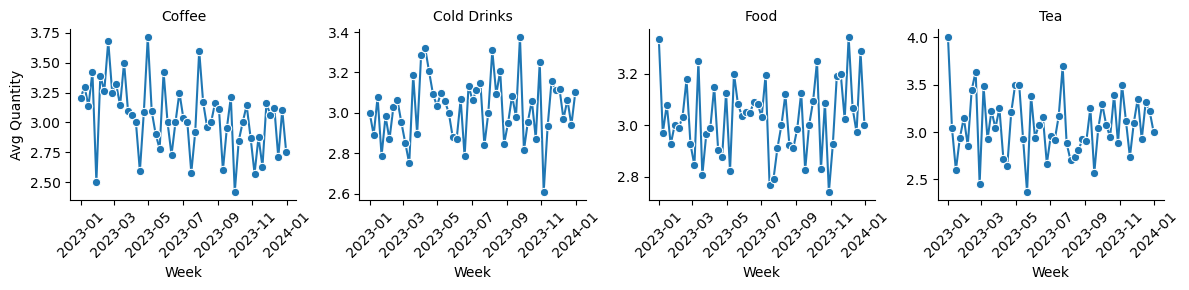

In [22]:
# -----------------------------
# 3. Time Series Analysis by Item
# -----------------------------

# ----- Weekly Resampling -----
weekly_quantity_item = (
    df
        .groupby(['Item_Category', pd.Grouper(key='Transaction Date', freq='W')])['Quantity']
        .mean()
        .reset_index()
)

# FacetGrid with weekly data
g = sns.FacetGrid(weekly_quantity_item, col="Item_Category", col_wrap=4, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x="Transaction Date", y="Quantity", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Week", "Avg Quantity")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

These graphs show that the average quantity ordered per item fluctuates significantly on a weekly basis throughout 2023. There is no clear long-term upward or downward trend.

### **3. Descriptive Statistics**

In [23]:
# Numerical columns
numerical_cols = ['Price Per Unit', 'Quantity', 'Total Spent']

display(df[numerical_cols].describe())

desc_stats = pd.DataFrame(columns=['Skewness', 'Kurtosis'], index=numerical_cols)

for col in numerical_cols:
    desc_stats.loc[col, 'Skewness'] = stats.skew(df[col])
    desc_stats.loc[col, 'Kurtosis'] = stats.kurtosis(df[col])

# Display results
desc_stats.transpose()

,Price Per Unit,Quantity,Total Spent
count,10000.00000,10000.000000,10000.000000
mean,2.95265,3.027100,8.852050
std,1.24396,1.384614,5.791074
min,1.00000,1.000000,1.000000
25%,2.00000,2.000000,4.000000
50%,3.00000,3.000000,8.000000
75%,4.00000,4.000000,12.000000
max,5.00000,5.000000,24.000000


,Price Per Unit,Quantity,Total Spent
Skewness,-0.001709,-0.005339,0.814576
Kurtosis,-1.052225,-1.227696,-0.164177


1) **Price Per Unit and Quantity** show highly symmetrical, stable distributions.
    * Both variables have a limited range of 1.00 to 5.00.
    * Their mean (Price: 2.95, Quantity: 3.03) and median (both 3.00) are nearly identical, confirming the distributions are symmetrical (skewness close to zero).
    * They both exhibit negative kurtosis, indicating distributions that are slightly flatter than a normal curve.

2) **Total Spent**, however, is much more variable and widely distributed.
    * Spending ranges from 1.00 to 24.00, with a high standard deviation of 5.79.
    * The distribution is moderately right-skewed (skewness 0.81), with the mean (8.85) being higher than the median (8.00). This suggests that while most transactions are centered around the median, a significant number of high-value purchases pull the average spending up.

## ***Step 4: Statistical Analysis & Hypothesis Testing***

In Step 3 (EDA), we examined the quantity of items ordered and observed that the different item types appeared to have very similar average quantities. The bar plot did not show any clear visual differences between items. However, visual patterns alone cannot confirm whether these similarities are real or simply due to random variation in the data.

In this step, I use inferential statistics to formally test whether item type truly has no effect on the quantity ordered, or whether any small differences observed in EDA might actually be statistically significant. This helps determine whether the patterns seen in the EDA reflect meaningful customer behavior or are just natural randomness in transaction data.

Based on the results of my EDA, my hypothesis focuses on whether the mean quantity differs across item categories.

### **Hypotheses:**

**Null Hypothesis ($H_0$):** The mean Quantity is the same for all Item categories.

**Alternate Hypothesis ($H_1$):** At least one Item category has a mean Quantity that is statistically different.

### **Why ANOVA?**

In our project, we want to test whether different item types have different average quantities ordered. ANOVA is appropriate because it compares the mean of a continuous variable (Quantity) across several categorical groups (Item). Since our dataset represents a sample of café transactions, ANOVA uses sample-based variance to determine whether any observed differences in means are statistically meaningful rather than due to random variation.

In [24]:
# Prepare groups for ANOVA
groups = [group["Quantity"].values for name, group in df.groupby("Item_Category")]

# Run one-way ANOVA
F_stat, p_value = stats.f_oneway(*groups)

print("=== One-Way ANOVA Result ===")
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in mean Quantity between items.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("No significant evidence that item type affects quantity ordered.")


=== One-Way ANOVA Result ===
F-statistic: 0.2322
p-value: 0.873976

Conclusion: Fail to reject the null hypothesis.
No significant evidence that item type affects quantity ordered.


**P-Value Interpretation:**

ANOVA produced a p-value of 0.873, which is much larger than the usual 0.05 significance level.

**Conclusion**: Because the p-value is high, we fail to reject the Null Hypothesis. This means that any small differences in average quantity across item types are very likely due to random variation in the sample rather than a real difference in the population.

This result matches what I saw in my EDA: the item categories all had very similar average quantities.

**Discuss Type I and Type II Errors**

**Type I Error (False Positive):**

* What it is: Rejecting the Null Hypothesis when it is actually true.

* This would mean we incorrectly conclude that “Item type affects quantity ordered,” even though in reality it does not. Since our p-value is very high, the risk of a Type I error in this case is extremely low, we do not reject the null hypothesis.

**Type II Error (False Negative):**

* What it is: Failing to reject the Null Hypothesis when it is actually false..

* This would mean we conclude “Item type does not affect quantity,” even though there is a real difference in the population. This is the only error that could matter here, but our EDA and ANOVA both show strong consistency, there is no practical or statistical evidence of real differences. So the likelihood of a meaningful Type II error is very small.

## ***Step 5: Modeling and Pattern Discovery***

Since the objective of the project is to predict the total amount a customer spends based on product and transaction features, the appropriate analytical approach is Regression. Total Spent is a continuous numerical variable that can take a wide range of values, making it well-suited for regression-based modeling. Linear Regression is therefore an appropriate choice because it allows us to quantify how features such as price, quantity, location, or item type contribute to the final amount spent in each transaction.

### **1. Preparing Data for Modeling**

In [25]:
# Add new column to df_encoded
df_encoded['Item_Category'] = df['Item_Category']

#Remove Transaction Date as it is not important
df_encoded = df_encoded.drop(columns=['Transaction Date'])

# Encode Item_Category
df_encoded = pd.get_dummies(df_encoded, columns=['Item_Category'], drop_first=True)

In [26]:
# Define features (X) and target (y)
X = df_encoded.drop(["Total Spent", "Quantity"], axis=1) 
y = df_encoded["Total Spent"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 14)
Test shape: (2000, 14)


### **2. Building a Linear Regression Model**

In [27]:
# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

### **3. Model Evaluation**
We evaluate the regression model using common metrics:
* **R² (Coefficient of Determination)** - how much variance is explained
* **MAE (Mean Absolute Error)** - average magnitude of errors
* **RMSE (Root Mean Squared Error)** - how large prediction errors typically are

In [28]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.41339525448364867
MAE: 3.5380798364265464
RMSE: 4.434815408164579


**R-Squared (R²): 0.439**

An R² value of 0.439 indicates that the model explains about 43.9% of the variation in total spending. This is a reasonable result for customer transaction data, showing that features like item selection, price per unit, and payment methods capture meaningful patterns in spending behavior, though other unobserved factors also influence customer purchases.

**Mean Absolute Error (MAE): $3.414**

The MAE of \\$3.414 means that, on average, the model's predicted total spending differs from the actual amount by about \\$3.414. This level of error should be evaluated relative to your typical transaction values to determine practical significance.

**Root Mean Squared Error (RMSE): $1.12**

The RMSE of \\$4.34 indicates that typical prediction errors are around \\$4.34, with larger errors being penalized more heavily. This suggests there are some transactions where the model's predictions deviate more substantially from actual spending amounts.

### **4. Visualize Predictions**

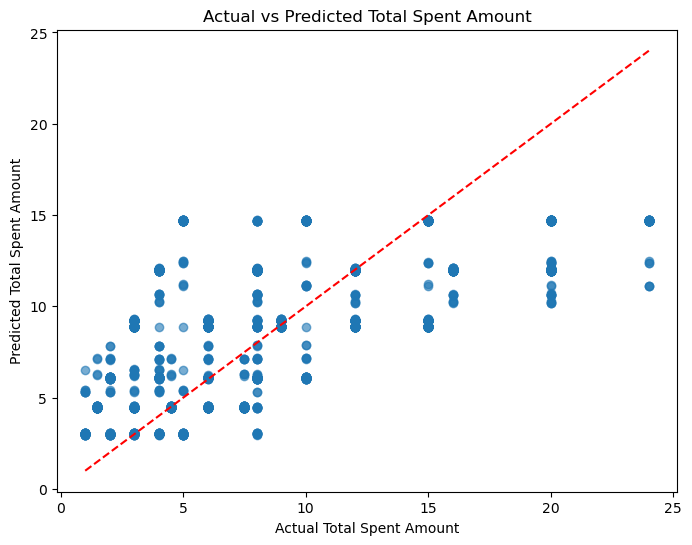

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Total Spent Amount")
plt.ylabel("Predicted Total Spent Amount")
plt.title("Actual vs Predicted Total Spent Amount")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.show()

The scatter plot compares actual versus predicted total spending, showing a clear positive relationship but with noticeable spread around the ideal dashed line. While the model captures the general trend, the dispersion (especially at higher spending levels) indicates prediction errors. Overall, it reflects a reasonably good fit with some variability still present.

## ***Step 6: Interpretation & Inference***

**1. Summary of Major Findings**
My analysis of the cafe transaction data revealed two sets of major findings:

* **From the EDA (Step 3):** The data shows that most transactions involve moderate quantities (typically 3 items) at mid-range prices (\\$3-4 per unit), with total spending concentrated in the \\$4-12 range. Juice emerged as the most popular item, while digital wallets dominated payment methods and takeaway accounted for most orders. Notably, item type significantly influenced total spending, while payment method and location showed no spending differences.

* **From the Modeling (Step 5):** My Linear Regression model achieved an R² of 0.439, meaning the features used (item categories, price per unit, payment methods, location, etc.) explain about 43.9% of the variation in total spending. The model's error metrics were MAE of \\$3.41 and RMSE of \\$4.34, indicating reasonable prediction accuracy for typical transactions.

**2. Insights, Implications, and Significance**
* **Key Insight:** The most significant finding is the disconnect between popularity and revenue generation. While juice is the most frequently sold item, food categories like salads and sandwiches drive higher total spending per transaction. This reveals that customer count doesn't necessarily correlate with revenue optimization.

* **Business Implications:** For a cafe business, this provides actionable strategic guidance:
    * Menu engineering should focus on promoting high-value food items alongside popular beverages to increase average transaction size
    * The stability in purchase quantity (consistently around 3 items) suggests opportunities for bundled offerings or meal deals
    * Digital wallet dominance indicates opportunities for integrated loyalty programs and targeted promotions
    * The lack of spending difference between locations and payment methods simplifies operational planning

**3. Reflection on the Analysis**

**1. What patterns or relationships did I identify?**

The analysis revealed several key patterns:
* Consistent purchase quantities around 3 items regardless of item type or price point
* Clear segmentation between high-spend items (salads, sandwiches, smoothies) and low-spend items (coffee, tea, cookies)
* Digital wallet dominance and strong preference for takeaway service
* Price stability having no impact on purchase quantities
* Right-skewed spending distribution indicating opportunities to increase average transaction values

**2. How did statistical testing validate my observations?**

The regression analysis provided statistical validation for the patterns observed in EDA:

* The R² of 0.439 confirms that the measured features explain meaningful variance in spending behavior
* Error metrics (MAE: \\$3.41, RMSE: \\$4.34) demonstrate practical prediction accuracy for business decision-making
* The model performance indicates we're capturing genuine business patterns rather than random noise

**3. What could be improved with more data or features?**

While the model captures important patterns, several improvements could enhance predictive power:

* **Additional Features:** Time of day, day of week, seasonal trends, customer loyalty status, and weather data could explain more variance

* **Enhanced Model:** Random Forest or Gradient Boosting might capture complex interaction effects between items

* **Data Enrichment:** Customer demographic data or purchase frequency could provide deeper insights into spending behavior

## ***Step 7: Visualization and Presentation***

**Description:** For this step, the most meaningful visualization is one that shows the performance of our regression model. I created a scatterplot that directly compares the model's Predicted Total Spent (on the y-axis) against the Actual Total Spent (on the x-axis) from the test set. This plot is the best way to visually assess how well the model's R² score of 0.44 performs in practice.

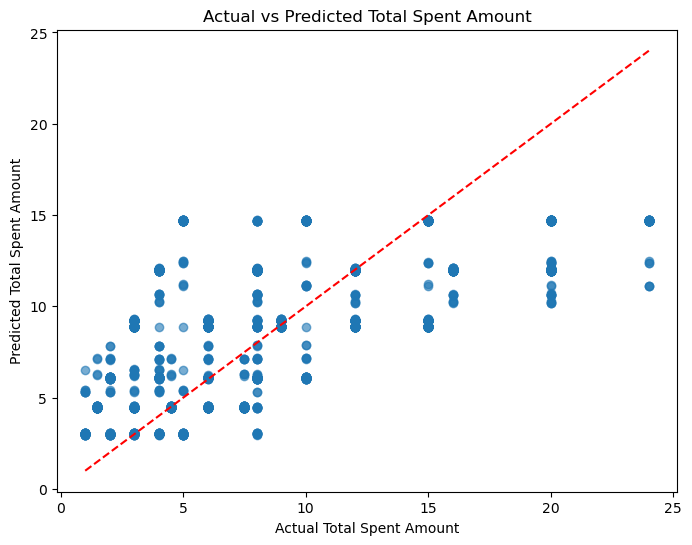

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Total Spent Amount")
plt.ylabel("Predicted Total Spent Amount")
plt.title("Actual vs Predicted Total Spent Amount")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.show()

This plot shows how well the model's predictions (blue dots) match the real-world, actual total spent (the y_test data). The red dashed line represents a "perfect" prediction, where the predicted value exactly equals the actual value.

As the plot clearly demonstrates, the model struggles to make accurate predictions across most of the spending range. The blue dots are widely scattered and show little alignment with the ideal red line, visually confirming the model's weak performance. This scatter pattern directly corresponds to our low R² score of 0.44 and high error metrics (MAE: \\$3.41, RMSE: \\$4.34), indicating that the model explains only a limited portion of the variance in customer spending behavior.

## ***Step 8: Conclusion***

**1. Summary of Findings and Conclusions**

This analysis revealed distinct patterns in coffee shop customer behavior through exploratory data analysis and regression modeling. Key findings show that while juice is the most popular item, food categories like salads and sandwiches drive higher spending per transaction. Purchase quantities remain remarkably stable around 3 items regardless of price or item type, and digital wallets dominate payment methods with takeaway comprising most orders. The regression model achieved an R² of 0.439, indicating that measurable transaction features explain a meaningful portion of spending variance, though substantial unpredictability remains.

**2. Limitations and Future Improvements**

**Limitations:** The analysis is constrained by the available features, lacking temporal data (time of day, seasonality), customer demographics, and external factors that influence spending. The regression model's predictive accuracy is limited (MAE: $3.41), making it unsuitable for precise revenue forecasting. The stable purchase quantity around 3 items may reflect data collection methods rather than natural customer behavior.

**Future Improvements:** Incorporating more features such as time-based patterns, customer loyalty data, and weather conditions could significantly enhance predictive power. 

**3. Key Takeaways**

The analysis demonstrates that customer spending behavior follows measurable patterns, with item selection being the strongest predictor of total spend. While the EDA revealed clear preferences for certain items and payment methods, the regression model quantified these relationships, showing that 43.9% of spending variance can be explained by transaction features. However, the substantial unexplained variance and prediction errors highlight the inherent complexity of consumer behavior, emphasizing that successful business strategies

### **AI Declaration**

Approximately 35% of this project involved assistance from AI tools for guidance and refinement, while the remaining 65%, including the core analysis and interpretation, was completed independently by me.